In [106]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'AppleGothic'
matplotlib.rcParams['axes.unicode_minus'] = False
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import mutual_info_classif

In [14]:
train_df = pd.read_csv('train.csv').drop('ID', axis=1)
test_df = pd.read_csv('test.csv').drop('ID', axis=1)

In [191]:
train_df.shape, test_df.shape

((7000, 17), (3000, 16))

In [192]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   나이        7000 non-null   int64  
 1   키(cm)     7000 non-null   int64  
 2   몸무게(kg)   7000 non-null   int64  
 3   BMI       7000 non-null   float64
 4   시력        7000 non-null   float64
 5   충치        7000 non-null   int64  
 6   공복 혈당     7000 non-null   int64  
 7   혈압        7000 non-null   int64  
 8   중성 지방     7000 non-null   int64  
 9   혈청 크레아티닌  7000 non-null   float64
 10  콜레스테롤     7000 non-null   int64  
 11  고밀도지단백    7000 non-null   int64  
 12  저밀도지단백    7000 non-null   int64  
 13  헤모글로빈     7000 non-null   float64
 14  요 단백      7000 non-null   int64  
 15  간 효소율     7000 non-null   float64
 16  label     7000 non-null   int64  
dtypes: float64(5), int64(12)
memory usage: 929.8 KB


In [193]:
train_df.isnull().sum()

나이          0
키(cm)       0
몸무게(kg)     0
BMI         0
시력          0
충치          0
공복 혈당       0
혈압          0
중성 지방       0
혈청 크레아티닌    0
콜레스테롤       0
고밀도지단백      0
저밀도지단백      0
헤모글로빈       0
요 단백        0
간 효소율       0
label       0
dtype: int64

In [201]:
train_df.describe().round(2)

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


,나이,키(cm),몸무게(kg),BMI,시력,충치,공복 혈당,혈압,중성 지방,혈청 크레아티닌,콜레스테롤,고밀도지단백,저밀도지단백,헤모글로빈,요 단백,간 효소율,label
count,7000.00,7000.00,7000.00,7000.00,7000.00,7000.00,7000.00,7000.00,7000.00,7000.00,7000.00,7000.00,7000.00,7000.00,7000.00,7000.00,7000.00
mean,43.97,164.78,65.93,24.14,1.01,0.23,99.33,45.53,127.14,0.88,197.28,57.36,115.35,14.63,1.08,1.14,0.37
std,12.06,9.17,12.98,3.50,0.43,0.42,21.13,8.82,73.92,0.24,36.31,14.51,41.79,1.54,0.39,0.43,0.48
min,20.00,135.00,30.00,14.27,0.10,0.00,57.00,14.00,21.00,0.10,86.00,18.00,1.00,4.90,1.00,0.14,0.00
25%,35.00,160.00,55.00,21.60,0.80,0.00,89.00,40.00,74.00,0.80,173.00,47.00,92.00,13.60,1.00,0.84,0.00
50%,40.00,165.00,65.00,23.88,1.00,0.00,96.00,45.00,107.00,0.90,195.00,55.00,113.00,14.80,1.00,1.10,0.00
75%,50.00,170.00,75.00,26.12,1.20,0.00,104.00,50.00,161.00,1.00,219.00,66.00,136.00,15.70,1.00,1.38,1.00
max,85.00,190.00,130.00,42.45,9.90,1.00,386.00,91.00,999.00,10.00,395.00,157.00,1340.00,20.90,5.00,5.67,1.00


# target 분포

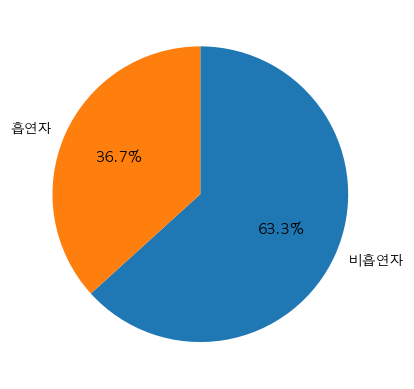

In [215]:
plt.pie(train_df['label'].value_counts(), labels=['비흡연자', '흡연자'], autopct='%.1f%%', startangle=90, counterclock=False)
plt.show()

# 상관관계 히트맵

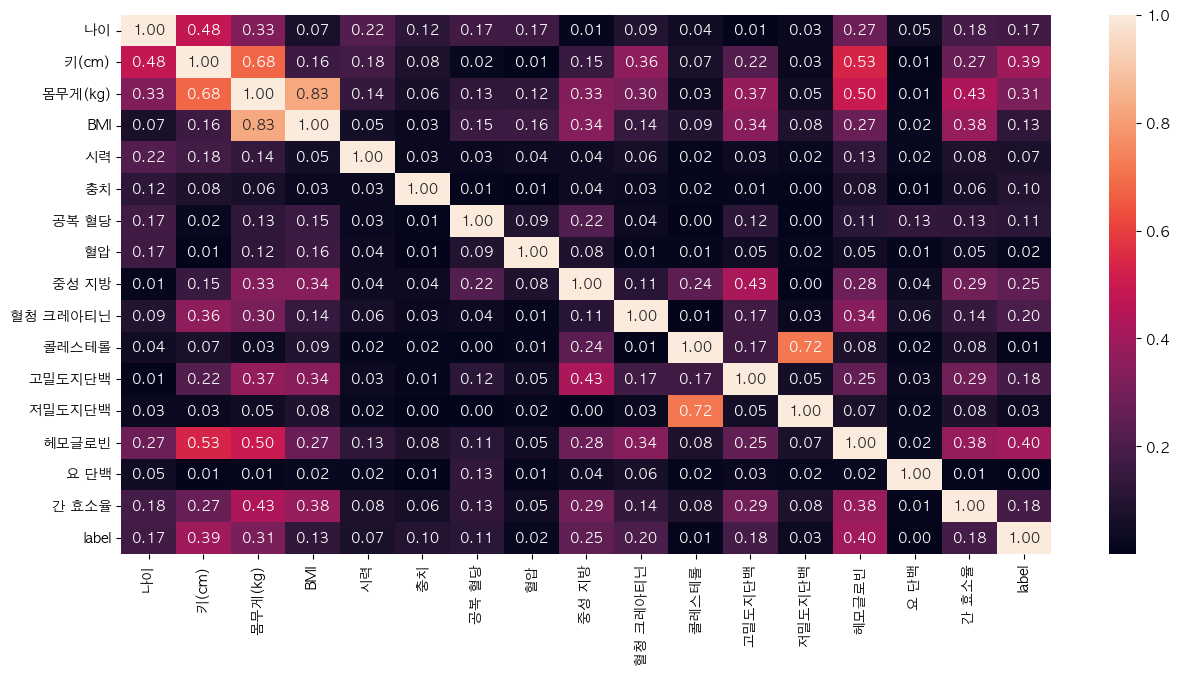

In [219]:
plt.figure(figsize=(15, 7))
sns.heatmap(train_df.corr().abs(), annot=True, fmt='.2f')
plt.show()

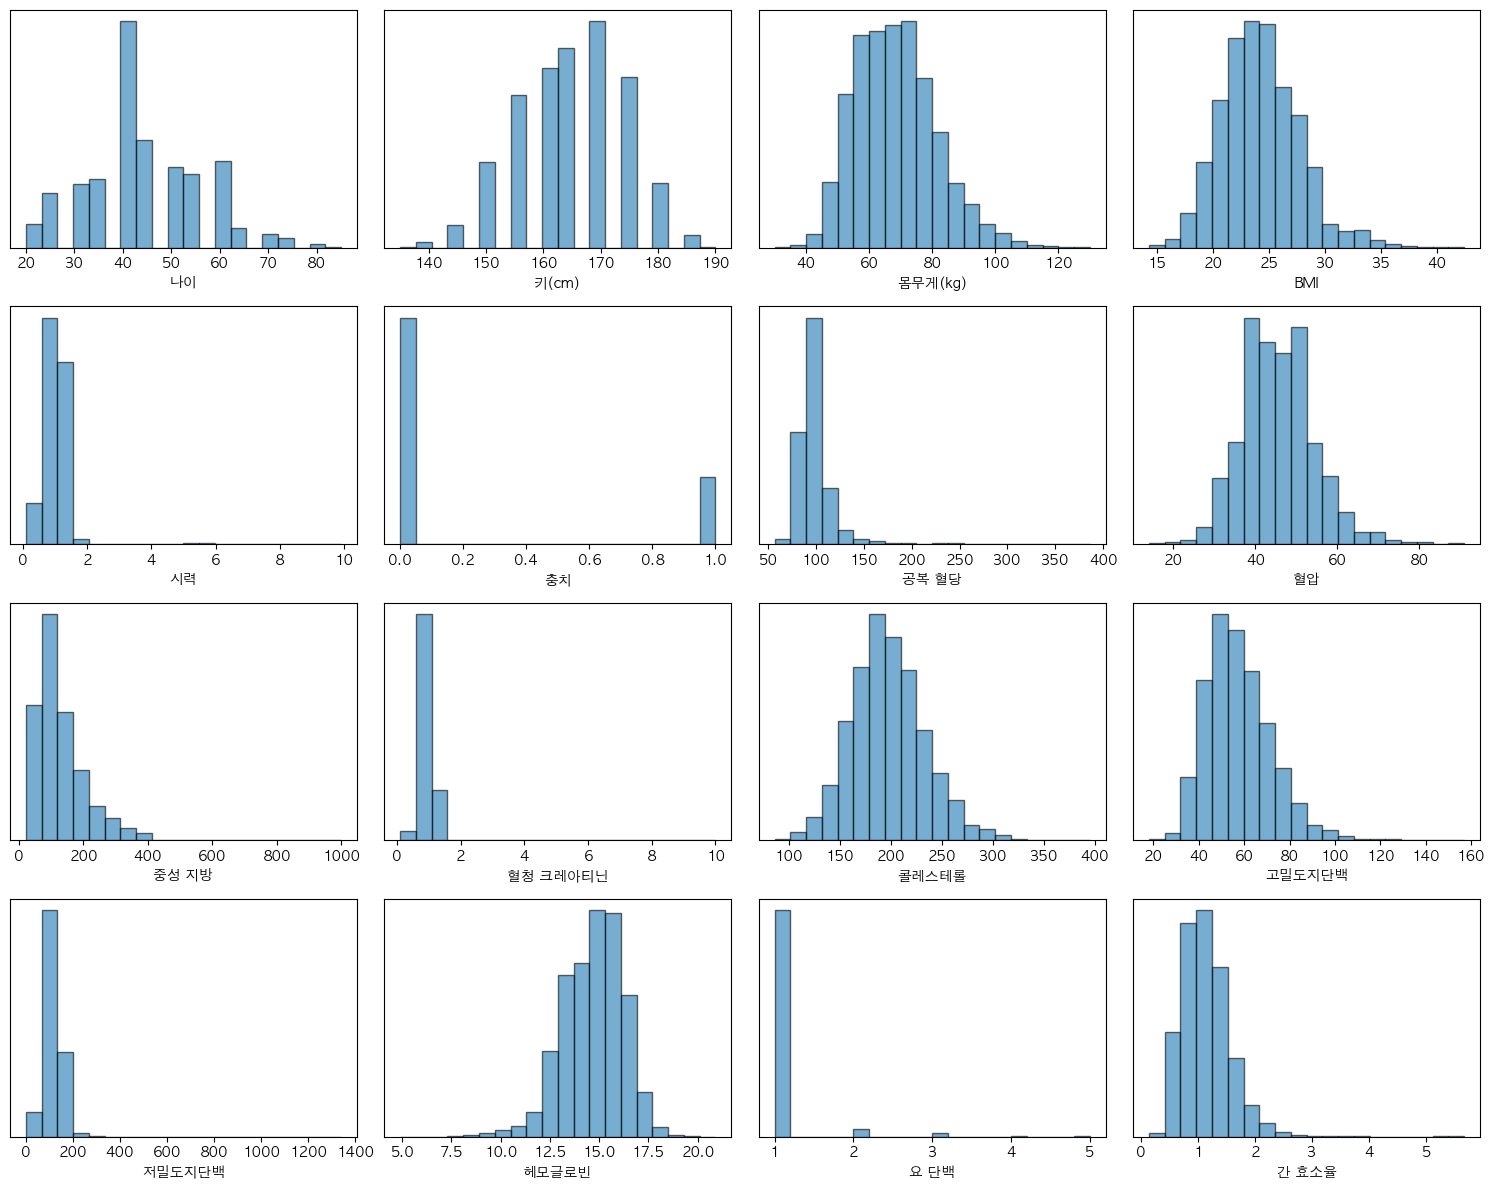

In [183]:
fig, axs = plt.subplots(4, 4, figsize=(15, 12))

for i, col in enumerate(test_df.columns):
    row = i // 4
    col_idx = i % 4
    ax = axs[row, col_idx]
    
    ax.hist(train_df[col], bins=20, ec='k', lw=1, alpha=0.6)
    ax.set_xlabel(col)
    ax.set_yticks([])
    
plt.tight_layout()
plt.show()

# Boxplot 이상치 탐지

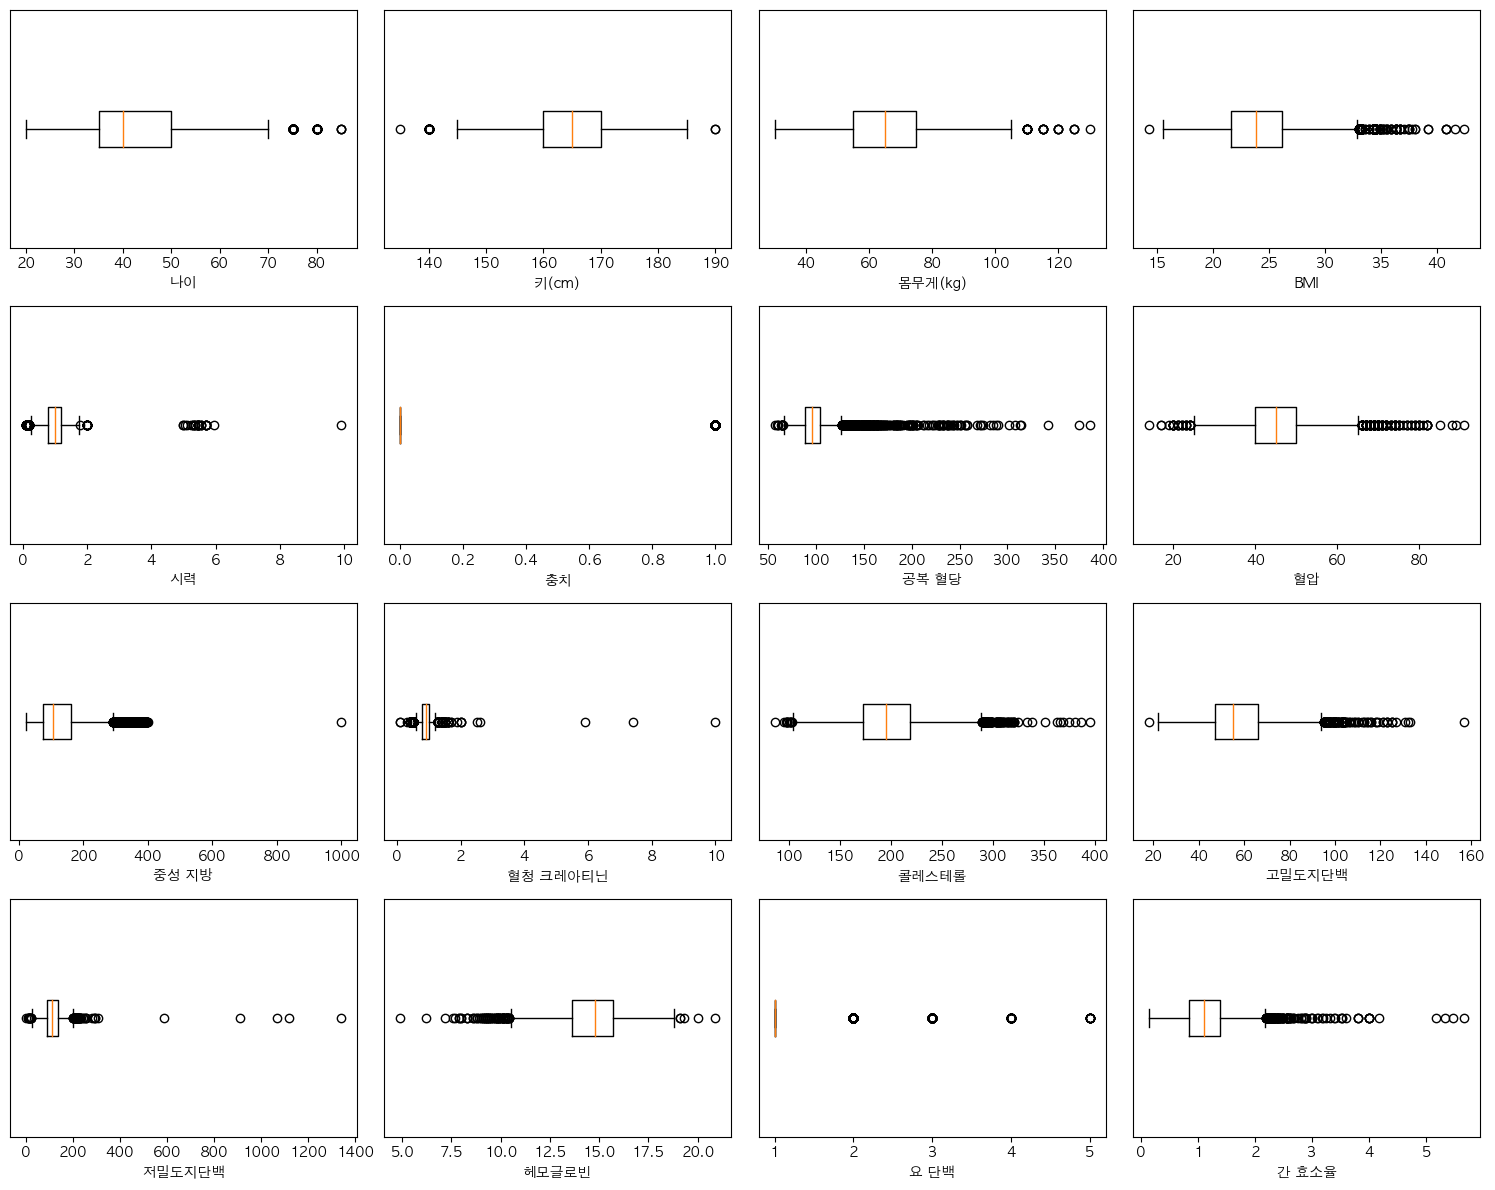

In [184]:
fig, axs = plt.subplots(4, 4, figsize=(15, 12))

for i, col in enumerate(test_df.columns):
    row = i // 4
    col_idx = i % 4
    
    ax = axs[row, col_idx]
    
    ax.boxplot(train_df[col], vert=False)
    ax.set_xlabel(col)
    ax.set_yticks([])
    
plt.tight_layout()
plt.show()

# Histplot

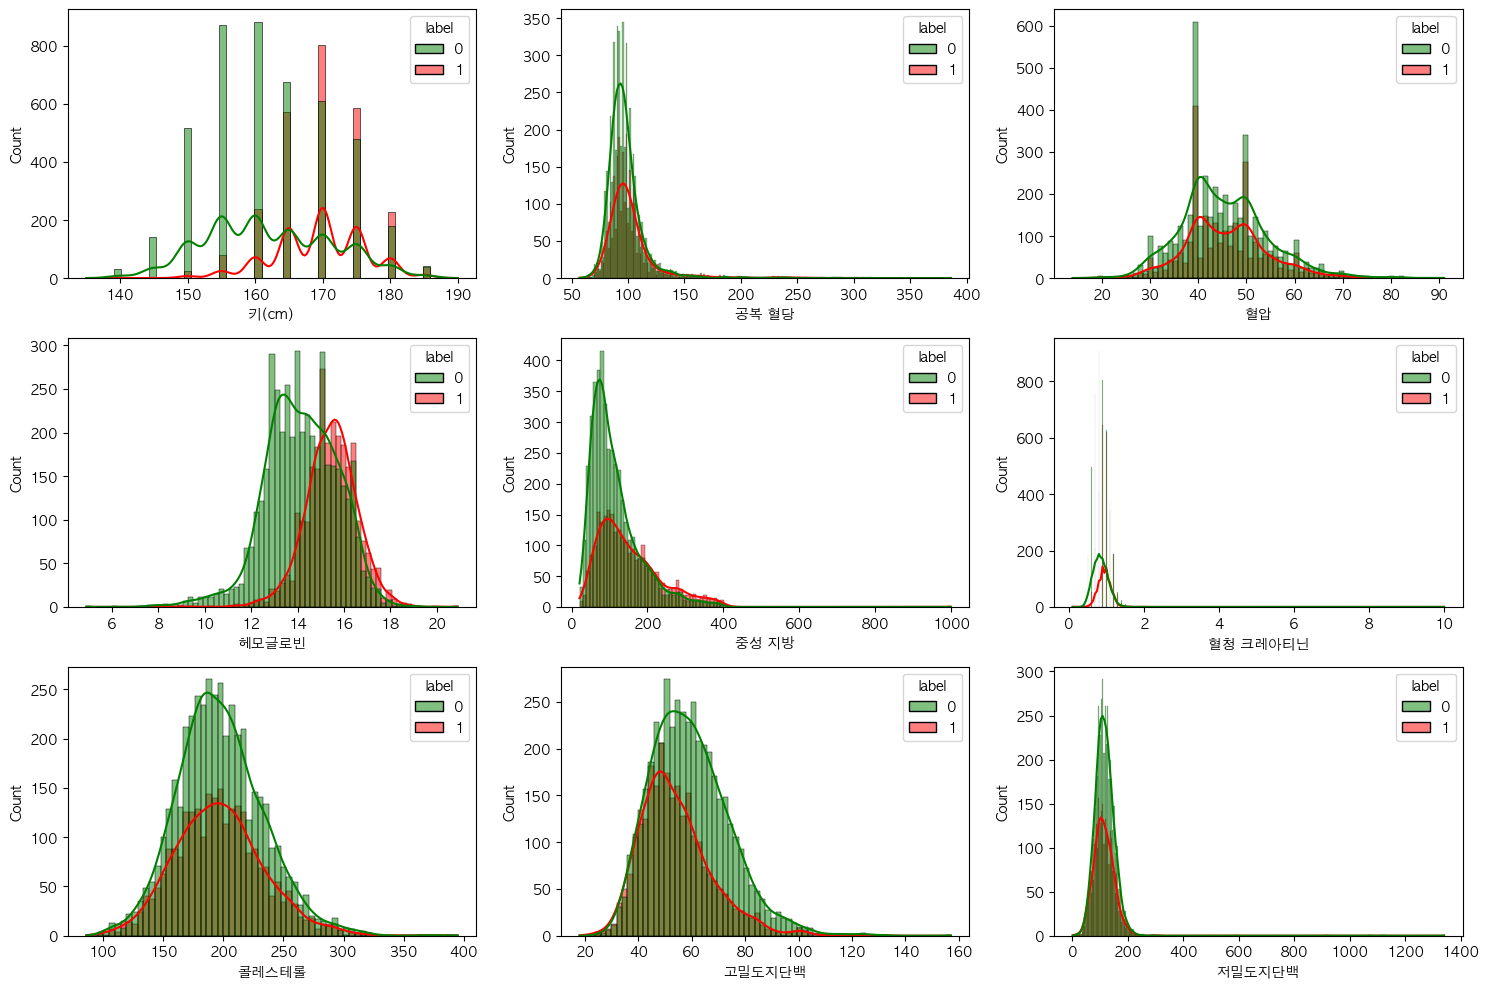

In [198]:
cols = ['키(cm)', '공복 혈당', '혈압', '헤모글로빈', '중성 지방','혈청 크레아티닌', '콜레스테롤', '고밀도지단백', '저밀도지단백', ]

fig, axs = plt.subplots(3, 3, figsize=(15, 10))

for i, col in enumerate(cols):
    row = i // 3
    col_idx = i % 3
    
    ax = axs[row, col_idx]
    
    sns.histplot(
        data=train_df, 
        x=train_df[col],
        kde=True,
        hue='label',
        palette={0:'green', 1:'red'},
        ax=ax
                )

plt.tight_layout()

# Pairplot

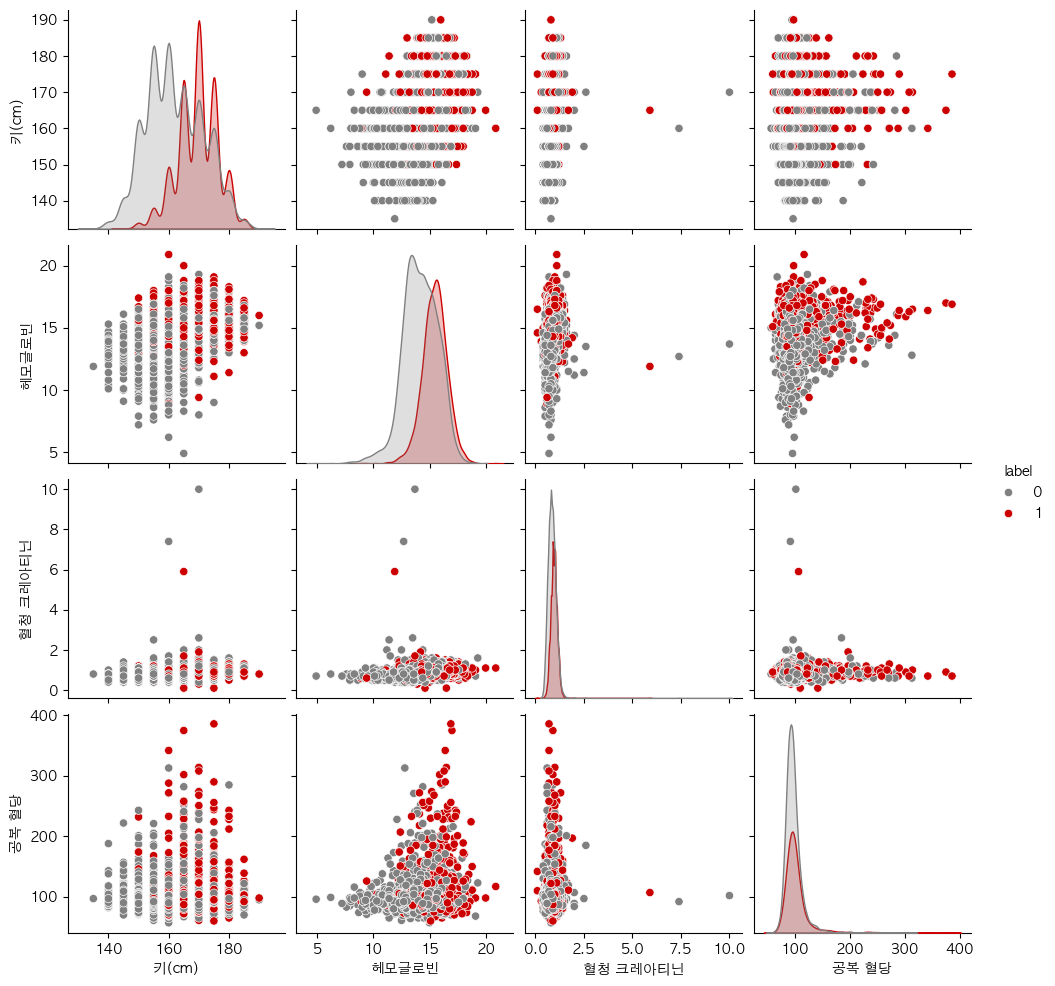

In [63]:
cols = ['키(cm)','헤모글로빈', '혈청 크레아티닌', '공복 혈당', 'label']
sns.pairplot(data=train_df[cols], hue='label', palette={0:'grey', 1:'#CC0000'})
plt.show()

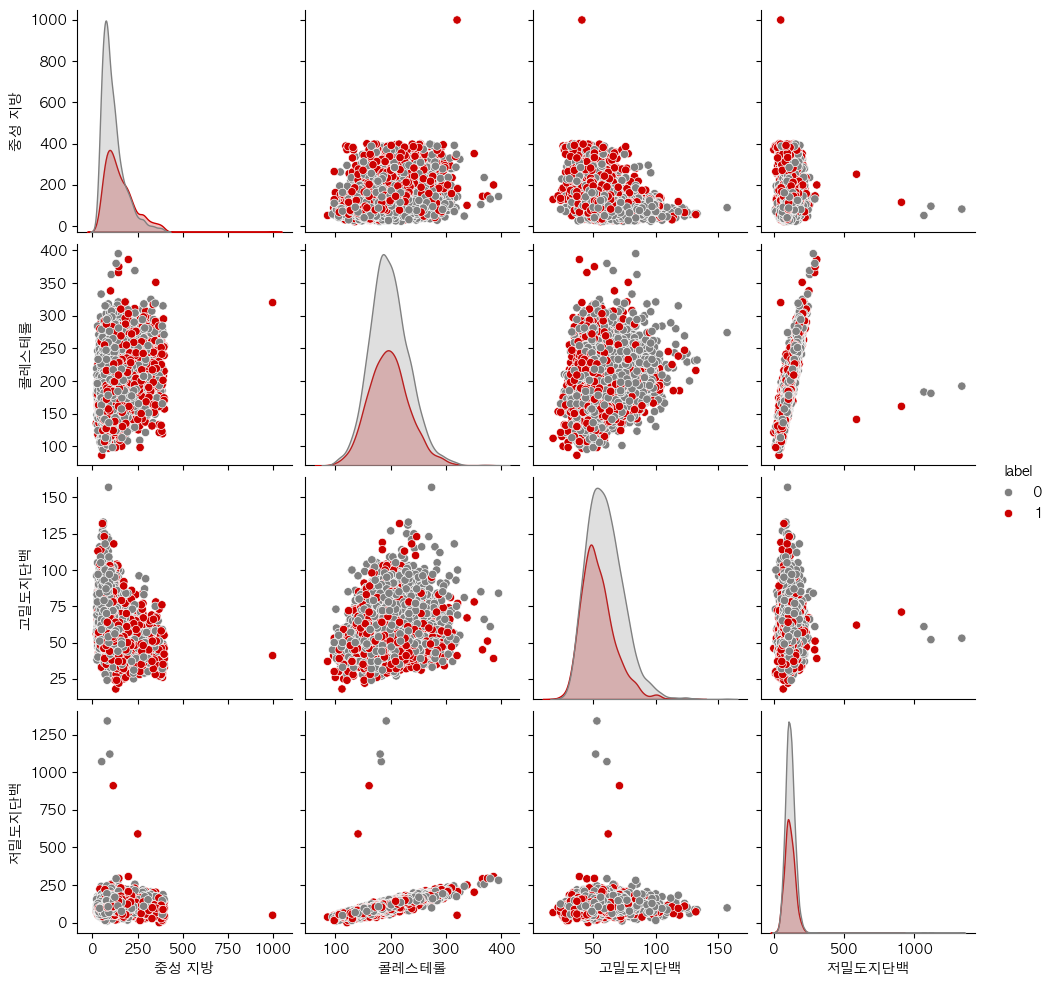

In [59]:
cols = ['중성 지방', '콜레스테롤', '고밀도지단백', '저밀도지단백', 'label']
sns.pairplot(data=train_df[cols], hue='label', palette={0:'grey', 1:'#CC0000'})
plt.show()